In [45]:
import pandas as pd
import numpy as np

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Explanation : 

   Joining the dataframe together creating a result in sqlite
   importing results from database created
   Data Visualization Part: Check in Database section

In [46]:
file_path = 'Applications\\Lighthouse\\Final-Project-Statistical-Modelling-with-Python\\data\\Bike_stations.csv",)

In [47]:
# renaming lattitude and longitude column to avoid confusion with restaurant data
Bike_stations = Bike_stations.rename(columns={'Latitude': 'station_lat',
                                              'Longitude': 'station_lon'})

In [48]:
Bike_stations

,Station Name,station_lat,station_lon,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,14
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,0
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,21
3,Bond St / Queen St E,43.653236,-79.376716,4
4,Church St / Alexander St,43.663722,-79.380288,7
...,...,...,...,...
701,Galbraith Rd / King's College Rd,43.660387,-79.395378,0
702,Exhibition GO Station,43.635201,-79.418771,12
703,Princes' Blvd / Nunavut Rd,43.633352,-79.414363,6
704,800 Fleet St,43.636804,-79.408832,17


In [49]:
yelp_restaurant = pd.read_csv('Applications\\Lighthouse\\/Final-Project-Statistical-Modelling-with-Python\\data\\yelp_restaurant.csv', delimiter =',')

In [50]:
#renaming latitude and longitude column to avoid confusion with bike_station data
yelp_restaurant = yelp_restaurant.rename(columns={'latitude': 'restaurant_lat',
                                              'longitude': 'restaurant_lon'})

In [51]:
yelp_restaurant

,name,distance,restaurant_lat,restaurant_lon,address,telephone,rating,review_counts,closed
0,Jaclyn's,172.375134,43.666270,-79.318020,"['1588 Queen Street E', 'Toronto, ON M4L 1G1',...",+1 647-901-8809,4.5,16,False
1,Lake Inez,794.661955,43.672340,-79.320640,"['1471 Gerrard Street E', 'Toronto, ON M4L 2A1...",NaN,4.5,95,False
2,Tulia Osteria,365.115394,43.664870,-79.324250,"['1402 Queen Street E', 'Toronto, ON M4L 1C9',...",+1 416-461-6400,4.5,2,False
3,Casa Di Giorgios,408.715724,43.666850,-79.315180,"['1646 Queen St E', 'Toronto, ON M4L 1G3', 'Ca...",+1 416-686-7066,4.0,75,False
4,Betty’s East,689.778721,43.663455,-79.327992,"['1301 Queen Street E', 'Toronto, ON M4L 1C2',...",+1 416-901-5575,3.5,6,False
...,...,...,...,...,...,...,...,...,...
9526,Sorrel,500.490388,43.680241,-79.391182,"['1158 Yonge Street', 'Toronto, ON M4W 2L9', '...",+1 416-926-1010,3.5,34,False
9527,Terroni,535.440876,43.680011,-79.390519,"['1095 Yonge Street', 'Toronto, ON M4W 2L8', '...",+1 416-925-4020,3.0,321,False
9528,Spiga Ristorante,201.636222,43.686230,-79.393540,"['1378 Yonge Street', 'Toronto, ON M4T 1Y5', '...",+1 416-960-1500,3.5,17,False
9529,Grandma Loves You,776.351005,43.677846,-79.390108,"['1084 Yonge Street', 'Toronto, ON M4W 2L4', '...",+1 416-925-5547,5.0,76,False


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [52]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [53]:
# creating our database into project file
connection = create_connection("Applications\\Lighthouse\\Final-Project-Statistical-Modelling-with-Python\\db_connection.db")

Connection to SQLite DB successful


In [54]:
# insert data from Bike_station dataframe
Bike_stations.to_sql('Bike_stations', connection, if_exists='replace', index=False)

706

In [55]:
# insert data from indian_restaurant dataframe
yelp_restaurant.to_sql('yelp_restaurant', connection, if_exists='replace',index=False)

9531

In [56]:
# commit changes
connection.commit()

In [57]:
# create a cursor object to execute SQL queries
cursor = connection.cursor()

In [58]:
# Perform a spatial join between the two tables using a SQL query
query = """
    SELECT bs.*, yr.*
    FROM Bike_stations AS bs
    JOIN yelp_restaurant AS yr
    ON (
        ((yr.restaurant_lat - bs.station_lat) * (yr.restaurant_lat - bs.station_lat) +
        (yr.restaurant_lon - bs.station_lon) * (yr.restaurant_lon - bs.station_lon)) <= (1.0 / 111.32) * (1.0 / 111.32)  -- 1km radius
    )
"""


In [59]:
# execute the query
cursor.execute(query)

In [60]:
# fetch the result
result = cursor.fetchall()

In [61]:
# create a dataframe from the result
result_df = pd.DataFrame(result, columns=[column[0] for column in cursor.description])

In [62]:
result_df

,Station Name,station_lat,station_lon,Bikes Available,name,distance,restaurant_lat,restaurant_lon,address,telephone,rating,review_counts,closed
0,Queen St E / Woodward Ave,43.665269,-79.319796,14,Jaclyn's,172.375134,43.666270,-79.318020,"['1588 Queen Street E', 'Toronto, ON M4L 1G1',...",+1 647-901-8809,4.5,16,0
1,Queen St E / Woodward Ave,43.665269,-79.319796,14,Lake Inez,794.661955,43.672340,-79.320640,"['1471 Gerrard Street E', 'Toronto, ON M4L 2A1...",None,4.5,95,0
2,Queen St E / Woodward Ave,43.665269,-79.319796,14,Tulia Osteria,365.115394,43.664870,-79.324250,"['1402 Queen Street E', 'Toronto, ON M4L 1C9',...",+1 416-461-6400,4.5,2,0
3,Queen St E / Woodward Ave,43.665269,-79.319796,14,Casa Di Giorgios,408.715724,43.666850,-79.315180,"['1646 Queen St E', 'Toronto, ON M4L 1G3', 'Ca...",+1 416-686-7066,4.0,75,0
4,Queen St E / Woodward Ave,43.665269,-79.319796,14,Betty’s East,689.778721,43.663455,-79.327992,"['1301 Queen Street E', 'Toronto, ON M4L 1C2',...",+1 416-901-5575,3.5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203762,800 Fleet St,43.636804,-79.408832,17,BaoBird Fried Chicken & Baos,802.719367,43.640584,-79.402567,"['28 Bathurst Street', 'Toronto, ON M5V 0C6', ...",None,5.0,1,0
203763,800 Fleet St,43.636804,-79.408832,17,UBE Night Market,260.249900,43.637334,-79.409135,"['250 Fort York Boulevard', 'Unit 57', 'The Be...",None,5.0,1,0
203764,800 Fleet St,43.636804,-79.408832,17,Roses Cocina,293.778794,43.633214,-79.411579,"['111 Princes Boulevard', 'Floor 2', 'Toronto...",+1 647-259-6825,3.0,13,0
203765,800 Fleet St,43.636804,-79.408832,17,Liberty Soho,755.786002,43.638467,-79.416825,"['139 E Liberty Street', 'Toronto, ON M6K 3K4'...",None,3.5,11,0


In [64]:
#inserting the data back into database
result_df.to_sql('Result', connection, if_exists='replace', index=False)

203767

In [65]:
# close the database connection
connection.close()

Visualize Data

In [40]:
result_df.shape

(203767, 13)

In [66]:
result_df.duplicated().sum()

0

In [67]:
# there are 2290 diplicated rows in result df and shape is quite large so we will drop duplicated values
result_df = result_df.drop_duplicates()

In [68]:
result_df.shape

(203767, 13)

In [69]:
result_df.describe()

,station_lat,station_lon,Bikes Available,distance,restaurant_lat,restaurant_lon,rating,review_counts,closed
count,203767.000000,203767.000000,203767.000000,203767.000000,203767.000000,203767.000000,203767.000000,203767.000000,203767.0
mean,43.657705,-79.389803,8.535985,485.297632,43.657774,-79.389856,4.162757,231.782521,0.0
std,0.014951,0.029625,7.204785,265.610305,0.014748,0.029607,0.490954,488.202644,0.0
min,43.588077,-79.544491,0.000000,2.175621,43.584960,-79.550880,0.000000,0.000000,0.0
25%,43.647663,-79.400042,2.000000,280.756728,43.648553,-79.400309,4.000000,22.000000,0.0
50%,43.655972,-79.387020,7.000000,460.386385,43.655715,-79.385537,4.000000,69.000000,0.0
75%,43.664769,-79.378623,13.000000,663.925966,43.664690,-79.378900,4.500000,231.000000,0.0
max,43.784242,-79.130120,38.000000,1391.637145,43.786855,-79.137323,5.000000,3495.000000,0.0


In [70]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


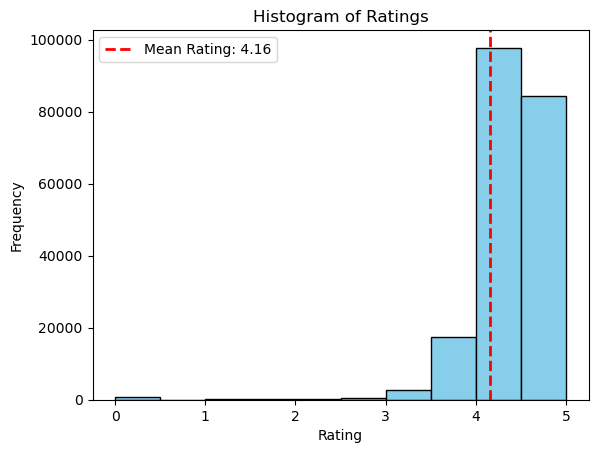

In [92]:
# create histogram of rating column
plt.hist(result_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# calculate and display the mean rating
mean_rating = result_df['rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth = 2, label=f"Mean Rating: {mean_rating:.2f}")
plt.legend()

plt.show()

In [72]:
result_df.isnull().sum()

Station Name           0
station_lat            0
station_lon            0
Bikes Available        0
name                   0
distance               0
restaurant_lat         0
restaurant_lon         0
address                0
telephone          17301
rating                 0
review_counts          0
closed                 0
dtype: int64

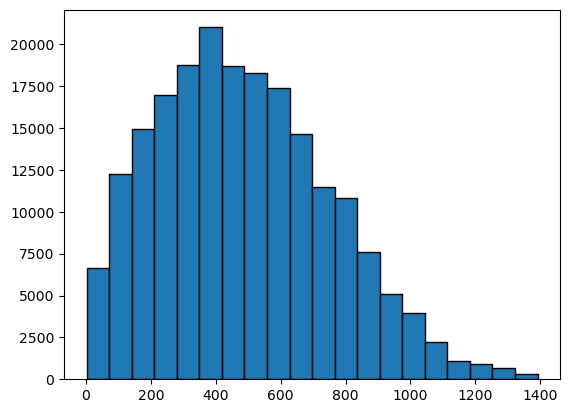

In [73]:
# create histogram of rating column
plt.hist(result_df['distance'], bins=20, edgecolor='k')

plt.show()

In [74]:
restaurant_counts = result_df['name'].value_counts()

In [75]:
restaurant_counts

Mogouyan Hand-Pulled Noodles    4541
The Rabbit Hole                 3360
Richmond Station                3024
Pai Northern Thai Kitchen       2999
Horangee Sikdang                2254
                                ... 
Pastable                           1
Simon Sushi                        1
Yummy Delight                      1
Parma Pizza                        1
Highland Harvest                   1
Name: name, Length: 1691, dtype: int64

In [76]:
# dropping rating rows with null values as replacing it with any other value is not feasable option as it could be misguiding the customers
result_df = result_df.dropna(subset=["rating"])

In [77]:
result_df.shape

(203767, 13)

##### Hypothesis Testing

(1) Null Hypothesis(H0): There is no significant difference in the mean rating of restaurants near bike stations and the mean rating of restaurants overall.

(2) Alternate Hyptothesis(H1): There is significant difference in the mean rating of restaurants near bike stations compared to the mean rating of restaurant overall

(3) conducting t-test to find the significance


In [78]:
# getting rating for each restaurant 
each_restaurant_rating = result_df[['name', 'rating']].drop_duplicates()

In [79]:
each_restaurant_rating

,name,rating
0,Jaclyn's,4.5
1,Lake Inez,4.5
2,Tulia Osteria,4.5
3,Casa Di Giorgios,4.0
4,Betty’s East,3.5
...,...,...
180793,Freshii,1.0
180851,The Leaside Pub,3.0
197898,The Olde Stone Cottage Pub & Patio,3.5
197901,Phoenix,4.0


In [80]:
# counting restaurants for each bike station
mean_rating_by_station = result_df.groupby('Station Name')['rating'].mean()

In [81]:
mean_rating_by_stations = pd.DataFrame(mean_rating_by_station)

In [82]:
mean_rating_by_stations

,rating
Station Name,
1 Market St - SMART,4.213768
101 Cedarvale Ave,4.210000
11 Spadina Rd,4.323920
111 Bond St (North of Dundas St E) - SMART,4.254269
111 Broadview Ave,4.267241
...,...
York St / Lake Shore Blvd W,4.012146
York St / Queens Quay W,3.935065
York University (Glendon Campus) - SMART,2.416667


In [89]:
from scipy import stats

#Define the two groups (1: Ratings of restaurants near bike stations, 2: Ratings of all restaurants)
group1_ratings = each_restaurant_rating['rating']
group2_ratings = mean_rating_by_stations['rating']

# perform a two_sample t-test
t_stat, p_value = stats.ttest_ind(group1_ratings, group2_ratings, equal_var=False)

#check if the p-value is less than alpha (0.05)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ratings.")
    
else:
    print("Null Hypothesis True. There is no significant difference in mean ratings")

Reject the null hypothesis. There is a significant difference in mean ratings.


In [79]:
p_value

0.577629374723956

Finding correlation between Bikes Avaialble and distance to each restaurant 

In [84]:
correlation_coefficient = result_df[['distance', 'Bikes Available']].corr().iloc[0,1]

In [85]:
correlation_coefficient

0.013662773924895283

Correlation coefficient is close to zero.
we can conclude:
    correlation is weak between bikes available and distance 

Look at the data before and after the join to validate your data.

In [86]:
Bike_stations

,Station Name,station_lat,station_lon,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,14
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,0
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,21
3,Bond St / Queen St E,43.653236,-79.376716,4
4,Church St / Alexander St,43.663722,-79.380288,7
...,...,...,...,...
701,Galbraith Rd / King's College Rd,43.660387,-79.395378,0
702,Exhibition GO Station,43.635201,-79.418771,12
703,Princes' Blvd / Nunavut Rd,43.633352,-79.414363,6
704,800 Fleet St,43.636804,-79.408832,17


In [94]:
yelp_restaurant

,name,distance,restaurant_lat,restaurant_lon,address,telephone,rating,review_counts,closed
0,Jaclyn's,172.375134,43.666270,-79.318020,"['1588 Queen Street E', 'Toronto, ON M4L 1G1',...",+1 647-901-8809,4.5,16,False
1,Lake Inez,794.661955,43.672340,-79.320640,"['1471 Gerrard Street E', 'Toronto, ON M4L 2A1...",NaN,4.5,95,False
2,Tulia Osteria,365.115394,43.664870,-79.324250,"['1402 Queen Street E', 'Toronto, ON M4L 1C9',...",+1 416-461-6400,4.5,2,False
3,Casa Di Giorgios,408.715724,43.666850,-79.315180,"['1646 Queen St E', 'Toronto, ON M4L 1G3', 'Ca...",+1 416-686-7066,4.0,75,False
4,Betty’s East,689.778721,43.663455,-79.327992,"['1301 Queen Street E', 'Toronto, ON M4L 1C2',...",+1 416-901-5575,3.5,6,False
...,...,...,...,...,...,...,...,...,...
9526,Sorrel,500.490388,43.680241,-79.391182,"['1158 Yonge Street', 'Toronto, ON M4W 2L9', '...",+1 416-926-1010,3.5,34,False
9527,Terroni,535.440876,43.680011,-79.390519,"['1095 Yonge Street', 'Toronto, ON M4W 2L8', '...",+1 416-925-4020,3.0,321,False
9528,Spiga Ristorante,201.636222,43.686230,-79.393540,"['1378 Yonge Street', 'Toronto, ON M4T 1Y5', '...",+1 416-960-1500,3.5,17,False
9529,Grandma Loves You,776.351005,43.677846,-79.390108,"['1084 Yonge Street', 'Toronto, ON M4W 2L4', '...",+1 416-925-5547,5.0,76,False


In [90]:
result_df

,Station Name,station_lat,station_lon,Bikes Available,name,distance,restaurant_lat,restaurant_lon,address,telephone,rating,review_counts,closed
0,Queen St E / Woodward Ave,43.665269,-79.319796,14,Jaclyn's,172.375134,43.666270,-79.318020,"['1588 Queen Street E', 'Toronto, ON M4L 1G1',...",+1 647-901-8809,4.5,16,0
1,Queen St E / Woodward Ave,43.665269,-79.319796,14,Lake Inez,794.661955,43.672340,-79.320640,"['1471 Gerrard Street E', 'Toronto, ON M4L 2A1...",None,4.5,95,0
2,Queen St E / Woodward Ave,43.665269,-79.319796,14,Tulia Osteria,365.115394,43.664870,-79.324250,"['1402 Queen Street E', 'Toronto, ON M4L 1C9',...",+1 416-461-6400,4.5,2,0
3,Queen St E / Woodward Ave,43.665269,-79.319796,14,Casa Di Giorgios,408.715724,43.666850,-79.315180,"['1646 Queen St E', 'Toronto, ON M4L 1G3', 'Ca...",+1 416-686-7066,4.0,75,0
4,Queen St E / Woodward Ave,43.665269,-79.319796,14,Betty’s East,689.778721,43.663455,-79.327992,"['1301 Queen Street E', 'Toronto, ON M4L 1C2',...",+1 416-901-5575,3.5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203762,800 Fleet St,43.636804,-79.408832,17,BaoBird Fried Chicken & Baos,802.719367,43.640584,-79.402567,"['28 Bathurst Street', 'Toronto, ON M5V 0C6', ...",None,5.0,1,0
203763,800 Fleet St,43.636804,-79.408832,17,UBE Night Market,260.249900,43.637334,-79.409135,"['250 Fort York Boulevard', 'Unit 57', 'The Be...",None,5.0,1,0
203764,800 Fleet St,43.636804,-79.408832,17,Roses Cocina,293.778794,43.633214,-79.411579,"['111 Princes Boulevard', 'Floor 2', 'Toronto...",+1 647-259-6825,3.0,13,0
203765,800 Fleet St,43.636804,-79.408832,17,Liberty Soho,755.786002,43.638467,-79.416825,"['139 E Liberty Street', 'Toronto, ON M6K 3K4'...",None,3.5,11,0


In [91]:
# creating a csv file for result_df for further use
result_df.to_csv("Applications\\Lighthouse\\Final-Project-Statistical-Modelling-with-Python\\Result.csv", index=False)